In [1]:
import torch
from torch import nn

### AND Gate
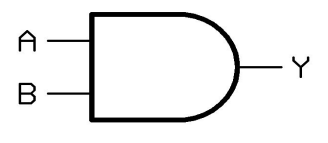

$X=\begin{bmatrix}0 & 0 \\ 0 & 1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$ $y_{and}=\begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix}$

In [2]:
X = torch.tensor([[0,0], [0,1], [1,0], [1,1]], dtype=torch.float)
y_and = torch.tensor([[0],[0],[0],[1]], dtype=torch.float)

In [66]:
and_model = nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)
and_model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

In [67]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(and_model.parameters(), lr=0.1)
epochs = 5000
for epoch in range(1, epochs):
    optimizer.zero_grad()
    hypothesis = and_model(X)
    loss = loss_fn(hypothesis, y_and)
    loss.backward()
    optimizer.step()
    if epoch % 500 == 0:
        print(f'Epoch: {epoch}, loss: {loss.item()}')    

Epoch: 500, loss: 0.22145745158195496
Epoch: 1000, loss: 0.1406782865524292
Epoch: 1500, loss: 0.10280409455299377
Epoch: 2000, loss: 0.08069612085819244
Epoch: 2500, loss: 0.06624143570661545
Epoch: 3000, loss: 0.056080762296915054
Epoch: 3500, loss: 0.04856463521718979
Epoch: 4000, loss: 0.042789094150066376
Epoch: 4500, loss: 0.03821783512830734


In [68]:
def predict(x, model=None):
    if model:
        return model(x).item()

In [69]:
for x in X:
    print(x, predict(x, model=and_model))

tensor([0., 0.]) 9.998245513997972e-05
tensor([0., 1.]) 0.03960855305194855
tensor([1., 0.]) 0.03960935026407242
tensor([1., 1.]) 0.9444775581359863


In [70]:
and_model[0].weight, and_model[0].bias

(Parameter containing:
 tensor([[6.0221, 6.0221]], requires_grad=True),
 Parameter containing:
 tensor([-9.2104], requires_grad=True))

In [75]:
and_model[0].weight[0]

tensor(6.0221, grad_fn=<SelectBackward0>)

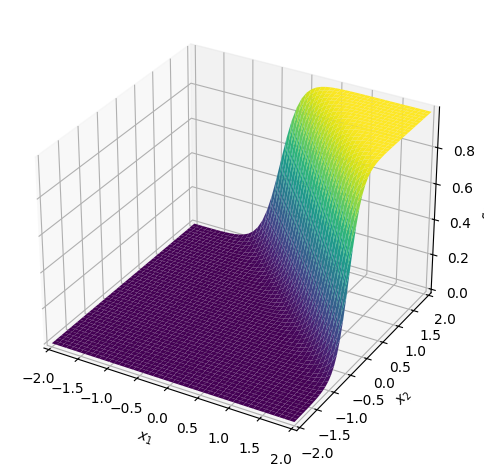

In [148]:
from sympy import symbols, exp
from sympy.plotting import plot3d

x = symbols('x')
sigmoid = 1 / (1+exp(-x))

x1, x2 = symbols('x1, x2')

regression = and_model[0].weight[0][0].item()*x1 + and_model[0].weight[0][1].item()*x2 + and_model[0].bias.item()
y = sigmoid.subs({'x': regression})

plot3d(y, (x1, -2, 2), (x2, -2, 2))

### OR Gate
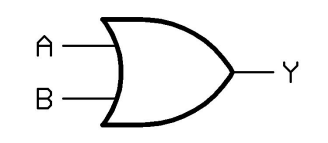

$X=\begin{bmatrix}0 & 0 \\ 0 & 1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$ $y_{or}=\begin{bmatrix} 0 \\ 1 \\ 1 \\ 1 \end{bmatrix}$

In [78]:
y_or = torch.tensor([[0],[1],[1],[1]], dtype=torch.float)

In [115]:
or_model = nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)
or_model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

In [116]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(or_model.parameters(), lr=0.1)
epochs = 5000
for epoch in range(1, epochs):
    optimizer.zero_grad()
    hypothesis = or_model(X)
    loss = loss_fn(hypothesis, y_or)
    loss.backward()
    optimizer.step()
    if epoch % 500 == 0:
        print(f'Epoch: {epoch}, loss: {loss.item()}')    

Epoch: 500, loss: 0.061392899602651596
Epoch: 1000, loss: 0.03551827743649483
Epoch: 1500, loss: 0.023893190547823906
Epoch: 2000, loss: 0.017614025622606277
Epoch: 2500, loss: 0.013783318921923637
Epoch: 3000, loss: 0.011240324005484581
Epoch: 3500, loss: 0.009445521980524063
Epoch: 4000, loss: 0.008119055069983006
Epoch: 4500, loss: 0.007103028707206249


In [117]:
for x in X:
    print(x, predict(x, model=or_model))

tensor([0., 0.]) 0.11990518867969513
tensor([0., 1.]) 0.9264495372772217
tensor([1., 0.]) 0.9263687133789062
tensor([1., 1.]) 0.9991409778594971


In [120]:
or_model[0].weight, or_model[0].bias

(Parameter containing:
 tensor([[4.5255, 4.5267]], requires_grad=True),
 Parameter containing:
 tensor([-1.9933], requires_grad=True))

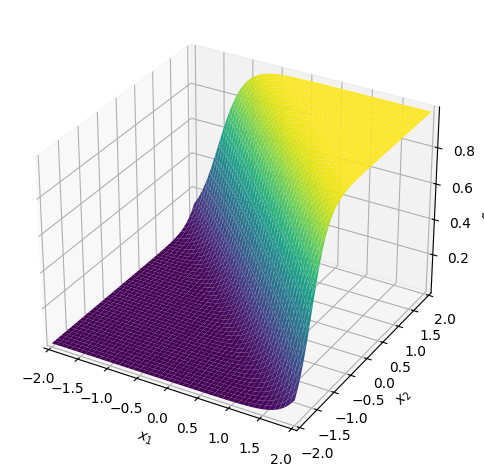

In [150]:
x = symbols('x')
sigmoid = 1 / (1+exp(-x))

x1, x2 = symbols('x1, x2')

regression = or_model[0].weight[0][0].item()*x1 + or_model[0].weight[0][1].item()*x2 + or_model[0].bias.item()
y = sigmoid.subs({'x': regression})

plot3d(y, (x1, -2, 2), (x2, -2, 2))

In [168]:
(1/6*1 + 1/6*2 + 1/6*3 + 1/6*4 + 1/6*5 + 1/6*6)

3.5